In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf
import sklearn.datasets
from sklearn.model_selection import train_test_split
import pickle
from sklearn.decomposition import PCA
import sklearn
#matplotlib inline


In [2]:
class callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_acc')>0.98):
            self.model.stop_training = True
cback = callbacks()
cb = [cback]

In [3]:
filename = 'mnisttest'
    
try:
    fileObject = open(filename, 'rb')
    mnist = pickle.load(fileObject)
    fileObject.close()
except:
    print("Downloading!")
    fileObject = open(filename, 'wb')
    mnist = sklearn.datasets.fetch_openml('mnist_784')
    pickle.dump(mnist, fileObject)
    fileObject.close()


In [4]:
Xraw = mnist.data.astype('float128')
yraw = mnist.target.astype('int64')

X_train, X_test, y_train, y_test = train_test_split(Xraw, yraw, test_size=0.25, random_state=42)

X_train = (X_train/255)
X_test = (X_test/255)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(52500, 784) (52500,) (17500, 784) (17500,)


In [5]:
pca = PCA(0.80)
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
#tenthfactor = pca.explained_variance_[0]/10
#num_comp = np.count_nonzero((pca.explained_variance_> tenthfactor).astype('int'))
#print((num_comp))


In [7]:
#num_comp = 25
#pca = PCA(n_components=num_comp)
#pca(0.8).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
num_input = X_train_pca.shape[1]


(52500, 43)


/home/abhinavjain/Documents/Milestone1/test/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Casting input data from 'float128' to 'float64' for imshow
  fig.canvas.print_figure(bytes_io, **kw)


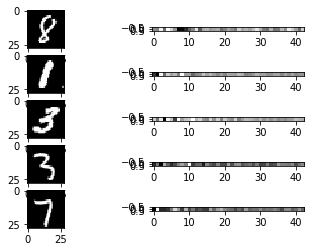

In [8]:
j = 0
for i in range(5):
    temp = np.random.randint(0, mnist.data.shape[1])
    j = j+1
    plt.subplot(5,2,j)
    plt.imshow((X_train)[temp].reshape(28,28), cmap = 'gray')
    j = j+1
    plt.subplot(5,2,j)
    plt.imshow((X_train_pca)[temp].reshape(1,-1), cmap = 'gray')
  
plt.show()


In [9]:
num_output = 10
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape = (num_input,)))
model.add(tf.keras.layers.Dense(32,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(num_output, activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2816      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 5,226
Trainable params: 5,226
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_data=(X_test_pca, y_test), callbacks=cb)



Train on 52500 samples, validate on 17500 samples
Epoch 1/20
52500/52500 [==============================] - 4s 69us/sample - loss: 0.3770 - acc: 0.8906 - val_loss: 0.1929 - val_acc: 0.9419
Epoch 2/20
52500/52500 [==============================] - 2s 42us/sample - loss: 0.1522 - acc: 0.9541 - val_loss: 0.1430 - val_acc: 0.9560
Epoch 3/20
52500/52500 [==============================] - 2s 42us/sample - loss: 0.1147 - acc: 0.9645 - val_loss: 0.1237 - val_acc: 0.9621
Epoch 4/20
52500/52500 [==============================] - 2s 41us/sample - loss: 0.0942 - acc: 0.9710 - val_loss: 0.1111 - val_acc: 0.9670
Epoch 5/20
52500/52500 [==============================] - 2s 43us/sample - loss: 0.0817 - acc: 0.9745 - val_loss: 0.1053 - val_acc: 0.9675
Epoch 6/20
52500/52500 [==============================] - 2s 43us/sample - loss: 0.0716 - acc: 0.9786 - val_loss: 0.1055 - val_acc: 0.9680
Epoch 7/20
52500/52500 [==============================] - 2s 40us/sample - loss: 0.0656 - acc: 0.9798 - val_loss: 0.